# Model Selection

This file fits the various models.  Each model's hypterparameters are tuned using cross-validation, the results are plotted, and the best hyperparameters and resulting CV scores are reported.

In [17]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import datetime
%matplotlib inline

In [2]:
# Read picklefile

picklefile = 'oct_20.pkl'
df = pd.read_pickle(picklefile)

In [3]:
# Select columns of intrest from the DataFrame
# Cutting out all non-delta, non-expw columns
# with this call.
# May want to revise later to give option to use.

df = df[['label', 'tourney_date',
                    'delta_ht', 'delta_age',
                    'delta_rank', 'delta_rank_points',
                    'delta_ace_expw', 'delta_df_expw',
                    'delta_svpt_expw', 'delta_1stIn_expw',
                    'delta_1stWon_expw', 'delta_2ndWon_expw',
                    'delta_SvGms_expw', 'delta_bpSaved_expw',
                    'delta_bpFaced_expw',]].dropna()

In [4]:
# Split data into train/test and holdout sets.
# Holdout set is the 2017 season, to be used for
# validation and backtesting betting simulation.

holdout = df[df.tourney_date > datetime.date(2017,1,1)]
df = df[df.tourney_date < datetime.date(2017,1,1)]

In [5]:
# Split DF into features, response.

Xcols = ['delta_ht', 'delta_age', 'delta_rank',
         'delta_rank_points', 'delta_ace_expw',
         'delta_df_expw', 'delta_svpt_expw',
         'delta_1stIn_expw', 'delta_1stWon_expw',
         'delta_2ndWon_expw', 'delta_SvGms_expw',
         'delta_bpSaved_expw', 'delta_bpFaced_expw']

ycols = 'label'

X = df[Xcols]
y = df[ycols]

In [6]:
# Helper function to plot Grid Searches.

def plot_grid_search(grid, param_name, model_name):
    params = [x[param_name] for x in grid.cv_results_['params']]
    train = grid.cv_results_['mean_train_score']
    test = grid.cv_results_['mean_test_score']
    best_param = grid.best_params_[param_name]

    plt.figure(figsize=(10,8))
    plt.title("Grid Search: {0:s}".format(model_name), fontsize=18)
    plt.xlabel(param_name, fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.axvline(best_param, color='k', linestyle='--')
    plt.plot(params, train, label='Training Accuracy')
    plt.plot(params, test, label='Test Accuracy')
    plt.legend();

# Results

### Logisitic Regression

Best value of C: 1.000
Cross-Validation Training Accuracy: 0.633
Cross-Validation Test Accuracy: 0.631


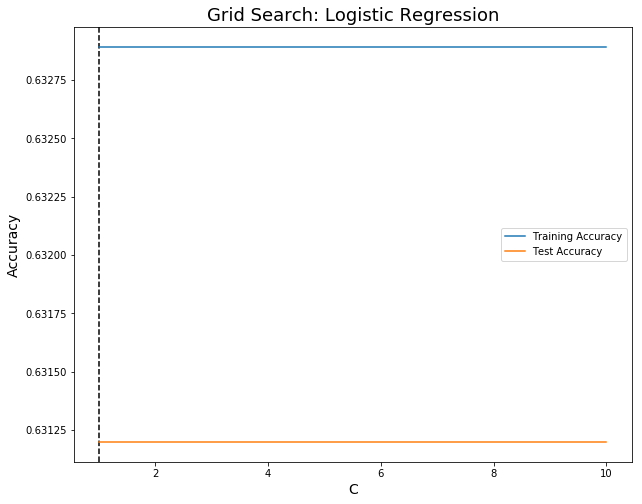

In [7]:
logreg = LogisticRegression()
param_grid = {'C': np.logspace(1e-10, 1, 10)}
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

plot_grid_search(grid, 'C', 'Logistic Regression')
training_acc = grid.cv_results_['mean_train_score'][grid.best_index_]
test_acc = grid.cv_results_['mean_test_score'][grid.best_index_]

print("Best value of {0:s}: {1:.3f}".format('C', grid.best_params_['C']))
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))

### Decision Tree

Best value of min_samples_split: 3335.000
Cross-Validation Training Accuracy: 0.633
Cross-Validation Test Accuracy: 0.626


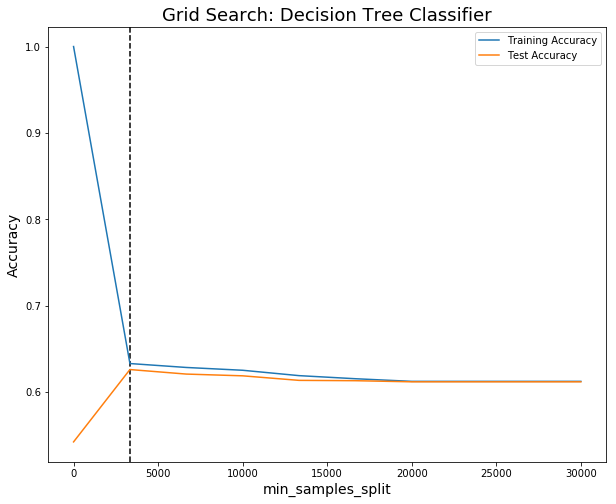

In [8]:
dt = DecisionTreeClassifier()
param_grid = {'min_samples_split': np.linspace(2, 30000, 10, dtype='int')}
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

plot_grid_search(grid, 'min_samples_split', 'Decision Tree Classifier')
training_acc = grid.cv_results_['mean_train_score'][grid.best_index_]
test_acc = grid.cv_results_['mean_test_score'][grid.best_index_]

print("Best value of {0:s}: {1:.3f}".format('min_samples_split', grid.best_params_['min_samples_split']))
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))

### Random Forest Classifier

Best value of n_estimators: 20.000
Cross-Validation Training Accuracy: 0.998
Cross-Validation Test Accuracy: 0.608


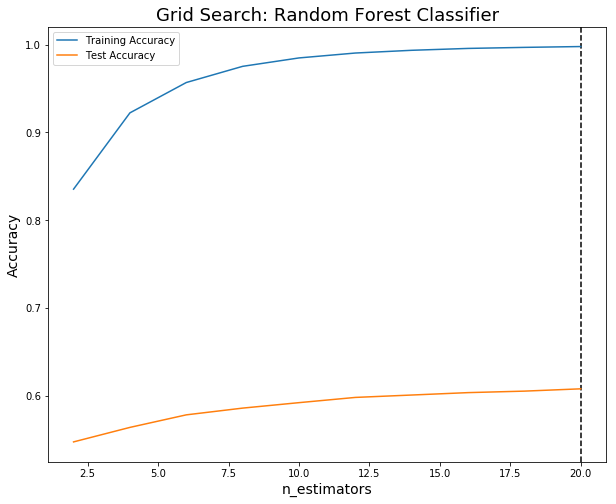

In [9]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': np.linspace(2, 20, 10, dtype='int')}
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

plot_grid_search(grid, 'n_estimators', 'Random Forest Classifier')
training_acc = grid.cv_results_['mean_train_score'][grid.best_index_]
test_acc = grid.cv_results_['mean_test_score'][grid.best_index_]

print("Best value of {0:s}: {1:.3f}".format('n_estimators', grid.best_params_['n_estimators']))
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))

### Naive Bayes

In [15]:
# No hyperparameter to Grid Search.
# Plot as a horizontal line on other graphs?

nb = GaussianNB()
training_acc = np.mean(cross_validate(nb, X, y)['train_score'])
test_acc = np.mean(cross_validate(nb, X, y)['test_score'])
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))

Cross-Validation Training Accuracy: 0.632
Cross-Validation Test Accuracy: 0.631


### K-Nearest Neighbors

Best value of n_neighbors: 223.000
Cross-Validation Training Accuracy: 0.634
Cross-Validation Test Accuracy: 0.630


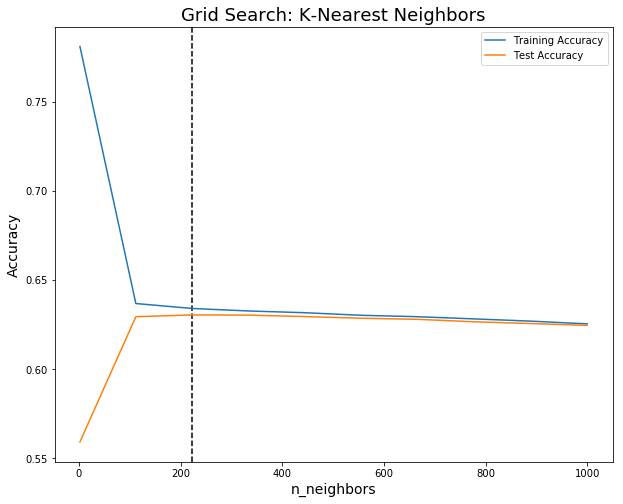

In [20]:
X_norm = normalize(X)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.linspace(2, 1000, 10, dtype='int')}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_norm, y)

plot_grid_search(grid, 'n_neighbors', 'K-Nearest Neighbors')
training_acc = grid.cv_results_['mean_train_score'][grid.best_index_]
test_acc = grid.cv_results_['mean_test_score'][grid.best_index_]

print("Best value of {0:s}: {1:.3f}".format('n_neighbors', grid.best_params_['n_neighbors']))
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))

### Support Vector Classifier

Best value of C: 10.000
Cross-Validation Training Accuracy: 0.629
Cross-Validation Test Accuracy: 0.627


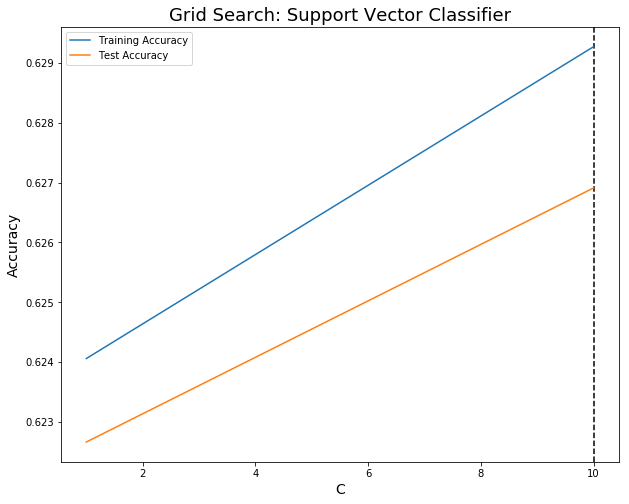

In [21]:
svc = SVC()
param_grid = {'C': np.logspace(1e-10, 1, 2, dtype='int')}
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_norm, y)

plot_grid_search(grid, 'C', 'Support Vector Classifier')
training_acc = grid.cv_results_['mean_train_score'][grid.best_index_]
test_acc = grid.cv_results_['mean_test_score'][grid.best_index_]

print("Best value of {0:s}: {1:.3f}".format('C', grid.best_params_['C']))
print("Cross-Validation Training Accuracy: {0:.3f}".format(training_acc))
print("Cross-Validation Test Accuracy: {0:.3f}".format(test_acc))